In [1]:
'''
Implement the Continuous Bag of Words (CBOW) Model.
Stages:
    a. Data preparation
    b. Generate training data
    c. Train model
    d. Output
'''

'\nImplement the Continuous Bag of Words (CBOW) Model.\nStages:\n    a. Data preparation\n    b. Generate training data\n    c. Train model\n    d. Output\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
sentences = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

# Clean the text
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)     # remove special characters
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences) # remove single-letter words
sentences = sentences.lower().strip()                   # lowercase and trim spaces

# Tokenize and build vocabulary
words = sentences.split()
vocab = set(words)
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

# Word to index mappings
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

In [4]:
# b. GENERATE TRAINING DATA
# -----------------------------

data = []
for i in range(context_size, len(words) - context_size):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))

print("Sample training pairs:\n", data[:5])

Sample training pairs:
 [(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea')]


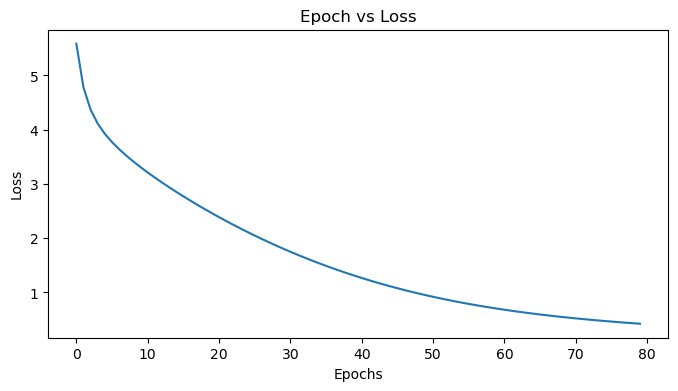

In [5]:
# -----------------------------
# c. TRAIN MODEL
# -----------------------------

# Initialize embeddings and weights
embeddings = np.random.random_sample((vocab_size, embed_dim))
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))

# Softmax and loss
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

def NLLLoss(log_probs, target):
    return -log_probs[0, target]

# Forward and backward pass
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = np.dot(m, theta)
    o = log_softmax(n)
    return m, n, o

def backward(preds, target_idx):
    m, n, o = preds
    softmax = np.exp(o)
    softmax[0, target_idx] -= 1
    grad = np.dot(m.T, softmax) / len(target_idx)
    return grad

# Train model
lr = 0.03
epochs = 80
epoch_losses = []

for epoch in range(epochs):
    losses = []
    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        target_idx = np.array([word_to_ix[target]])

        preds = forward(context_idxs, theta)
        loss = NLLLoss(preds[-1], target_idx)
        grad = backward(preds, target_idx)
        theta -= lr * grad  # update weights

        losses.append(loss)
    epoch_losses.append(np.mean(losses))

# Plot loss per epoch
plt.figure(figsize=(8,4))
plt.plot(range(epochs), epoch_losses)
plt.title("Epoch vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [6]:
# -----------------------------
# d. OUTPUT
# -----------------------------

def predict(context_words):
    context_idxs = np.array([word_to_ix[w] for w in context_words])
    preds = forward(context_idxs, theta)
    return ix_to_word[np.argmax(preds[-1])]

# Example prediction
print("\nPredicted word for context ['we', 'are', 'to', 'study'] →", predict(['we', 'are', 'to', 'study']))

# Accuracy check
def accuracy():
    correct = 0
    for context, target in data:
        if predict(context) == target:
            correct += 1
    return correct / len(data)

print("\nModel Accuracy:", accuracy())


Predicted word for context ['we', 'are', 'to', 'study'] → about

Model Accuracy: 1.0
